# <center>Text Mining and Wordcloud Fundamentals</center>
# <center>Assignment 5</center>

| Course | Instructor | Full Name | Date       | Term   |
|--------|------------|-----------|------------|--------|
| ALY6040 | Dr Chinthaka Pathum Dinesh, Prof Herath Gedara, Faculty Lecturer | Abhilash Dikshit | May 13, 2023 | Spring |


## Step 1: Data Cleaning
We begin by importing the necessary libraries and loading the dataset into a Pandas DataFrame.

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings(action='ignore')


In [4]:
print('\033[1mAmazon Unlocked Mobile Dataset:\n' + '='*30 + '\033[0m')

# Read in the CSV file
path = '~/GitProjects/Datasets/Amazon_Unlocked_Mobile.csv'
df_raw = pd.read_csv(path)

print('\nDisplay Raw Dataset:\n')
display(df_raw)

# Display basic information about the dataset
table = [['Type', 'Length', 'Shape'], [type(df_raw), len(df_raw), df_raw.shape]]

print('\nDisplay Type, Length, Shape about the dataset:\n')
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


Amazon Unlocked Mobile Dataset:

Display Raw Dataset:



,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0



Display Type, Length, Shape about the dataset:

╒═══════════════════════════════════════╤══════════╤═════════════╕
│ Type                                  │   Length │ Shape       │
╞═══════════════════════════════════════╪══════════╪═════════════╡
│ <class 'pandas.core.frame.DataFrame'> │   413840 │ (413840, 6) │
╘═══════════════════════════════════════╧══════════╧═════════════╛


In [5]:
# Create an empty dictionary to store the results
result_dict = {}

# Loop through all columns in the DataFrame
for col in df_raw.columns:
    
    # Check if column data type is numeric
    if df_raw[col].dtype != 'object':
        # Get the max and min values of the column
        max_val = df_raw[col].max()
        min_val = df_raw[col].min()

        # Count the number of NaN values in the column
        na_count = df_raw[col].isna().sum()

        # Add the results to the dictionary
        result_dict[col] = {"max_val": max_val, "min_val": min_val, "na_count": na_count, "data_type": str(df_raw[col].dtype)}
        
    # Check if column data type is object
    elif df_raw[col].dtype == 'object':
        # Count the number of NaN values in the column
        na_count = df_raw[col].isna().sum()

        # Get the unique values of the column
        unique_values = df_raw[col].nunique()

        # Add the results to the dictionary
        result_dict[col] = {"na_count": na_count, "unique_values": unique_values, "data_type": str(df_raw[col].dtype)}

# Convert the dictionary to a list of lists
result_list = [[k, v.get("data_type", ""), v.get("max_val", ""), v.get("min_val", ""), v.get("na_count", ""), v.get("unique_values", "")] for k, v in result_dict.items()]

# Add headers to the list
headers = ["Column Name", "Data Type", "Max Length", "Min Length", "NA Count", "Unique Count"]
result_list.insert(0, headers)

# Print the results
print(tabulate(result_list, headers="firstrow", tablefmt='fancy_grid'))


╒═══════════════╤═════════════╤══════════════╤══════════════╤════════════╤════════════════╕
│ Column Name   │ Data Type   │ Max Length   │ Min Length   │   NA Count │ Unique Count   │
╞═══════════════╪═════════════╪══════════════╪══════════════╪════════════╪════════════════╡
│ Product Name  │ object      │              │              │          0 │ 4410           │
├───────────────┼─────────────┼──────────────┼──────────────┼────────────┼────────────────┤
│ Brand Name    │ object      │              │              │      65171 │ 384            │
├───────────────┼─────────────┼──────────────┼──────────────┼────────────┼────────────────┤
│ Price         │ float64     │ 2598.0       │ 1.73         │       5933 │                │
├───────────────┼─────────────┼──────────────┼──────────────┼────────────┼────────────────┤
│ Rating        │ int64       │ 5            │ 1            │          0 │                │
├───────────────┼─────────────┼──────────────┼──────────────┼────────────┼──────

In [6]:
df_raw.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [7]:
# check the basic statistics of the dataset
print(df_raw[['Brand Name', 'Reviews']].describe())

       Brand Name Reviews
count      348669  413778
unique        384  162491
top       Samsung    Good
freq        65747    2879


In [8]:
display(df_raw['Brand Name'].value_counts())

Samsung         65747
BLU             63248
Apple           58186
LG              22417
BlackBerry      16872
                ...  
M-HORSE             1
ToShare Tech        1
LeEco               1
Danger Inc.         1
Concox              1
Name: Brand Name, Length: 384, dtype: int64

We can drop NA rows from Reviews column from the dataset:

In [9]:
df_raw.dropna(subset=['Reviews'], inplace=True)

We also remove any duplicate rows from the dataset:

In [10]:
df_raw.drop_duplicates(inplace=True)

We also convert the Brand name column to lowercase from the dataset:

In [11]:
# Reset Index Value
df = df_raw.reset_index(drop=True)

# Convert all values to lower case
df['Brand Name'] = df['Brand Name'].str.lower()
display(df)

# Get count of unique values
unique_brands = df['Brand Name'].unique()
count_unique_brands = len(unique_brands)
print('\nCount of unique values before cleanup:',count_unique_brands)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
349705,Samsung Convoy U640 Phone for Verizon Wireless...,samsung,79.95,5,"Great phone. Large keys, best flip phone I hav...",0.0
349706,Samsung Convoy U640 Phone for Verizon Wireless...,samsung,79.95,5,"Pros...Works great, very durable, easy to navi...",0.0
349707,Samsung Convoy U640 Phone for Verizon Wireless...,samsung,79.95,5,just as described perfect for the price,0.0
349708,Samsung Convoy U640 Phone for Verizon Wireless...,samsung,79.95,1,Would not work,0.0



Count of unique values before cleanup: 331


In [12]:
# use replace() method to map 'substring' to respective brands

# fill missing values in 'Brand Name' column with 'unknown'
df['Brand Name'].fillna(value='Unknown', inplace=True)

# use replace() method to map 'substring' to respective brands
df.loc[df['Brand Name'].str.contains('sam|s7|s8|galaxy'), 'Brand Name'] = 'samsung'
df.loc[df['Brand Name'].str.contains('appl'), 'Brand Name'] = 'apple'
df.loc[df['Brand Name'].str.contains('black'), 'Brand Name'] = 'blackberry'
df.loc[df['Brand Name'].str.contains('lg'), 'Brand Name'] = 'lg'
df.loc[df['Brand Name'].str.contains('mot'), 'Brand Name'] = 'motorola'
df.loc[df['Brand Name'].str.contains('nok'), 'Brand Name'] = 'nokia'
df.loc[df['Brand Name'].str.contains('cat'), 'Brand Name'] = 'caterpillar'
df.loc[df['Brand Name'].str.contains('amaz|amar'), 'Brand Name'] = 'amazon'
df.loc[df['Brand Name'].str.contains('len'), 'Brand Name'] = 'lenovo'
df.loc[df['Brand Name'].str.contains('tcl'), 'Brand Name'] = 'tcl'
df.loc[df['Brand Name'].str.contains('roid'), 'Brand Name'] = 'android'
df.loc[df['Brand Name'].str.contains('moto'), 'Brand Name'] = 'motorola'
df.loc[df['Brand Name'].str.contains('dell'), 'Brand Name'] = 'dell'
df.loc[df['Brand Name'].str.contains('son|eson|ssiony'), 'Brand Name'] = 'sony'
df.loc[df['Brand Name'].str.contains('hua'), 'Brand Name'] = 'huawei'
df.loc[df['Brand Name'].str.contains('asu'), 'Brand Name'] = 'asus'
df.loc[df['Brand Name'].str.contains('htc'), 'Brand Name'] = 'htc'
df.loc[df['Brand Name'].str.contains('goo'), 'Brand Name'] = 'google'
df.loc[df['Brand Name'].str.contains('shenz'), 'Brand Name'] = 'shenzhen'
df.loc[df['Brand Name'].str.contains('hp'), 'Brand Name'] = 'hp'
df.loc[df['Brand Name'].str.contains('micro'), 'Brand Name'] = 'microsoft'
df.loc[df['Brand Name'].str.contains('at&t'), 'Brand Name'] = 'at&t'
df.loc[df['Brand Name'].str.contains('conc'), 'Brand Name'] = 'concox'
df.loc[df['Brand Name'].str.contains('blu'), 'Brand Name'] = 'blu'
df.loc[df['Brand Name'].str.contains('san'), 'Brand Name'] = 'sanyo'
df.loc[df['Brand Name'].str.contains('unassigned|elephone|otterbox|worryfree|limited'), 'Brand Name'] = 'Others'
df.loc[~df['Brand Name'].str.contains('samsung|apple|blackberry|lg|motorola|nokia|caterpillar|amazon|len|tcl|android|motorola|dell|sony|huawei|asus|htc|google|shenzhen|hp|microsoft|at&t|concox|blu|sanyo', case=False), 'Brand Name'] = 'others'
df['Brand Name'] = df['Brand Name'].str.lower()

# Get count of unique values
unique_brands = df['Brand Name'].unique()
display(unique_brands)
count_unique_brands = len(unique_brands)
print('\nCount of unique values after cleanup:',count_unique_brands)

array(['samsung', 'nokia', 'others', 'lenovo', 'huawei', 'caterpillar',
       'tcl', 'lg', 'amazon', 'android', 'apple', 'asus', 'blackberry',
       'motorola', 'blu', 'sanyo', 'sony', 'htc', 'dell', 'google',
       'shenzhen', 'hp', 'microsoft', 'at&t', 'concox'], dtype=object)


Count of unique values after cleanup: 25


## Step 2: Exploratory Data Analysis
We now perform some exploratory data analysis to understand the distribution of ratings and the length of reviews in the dataset.

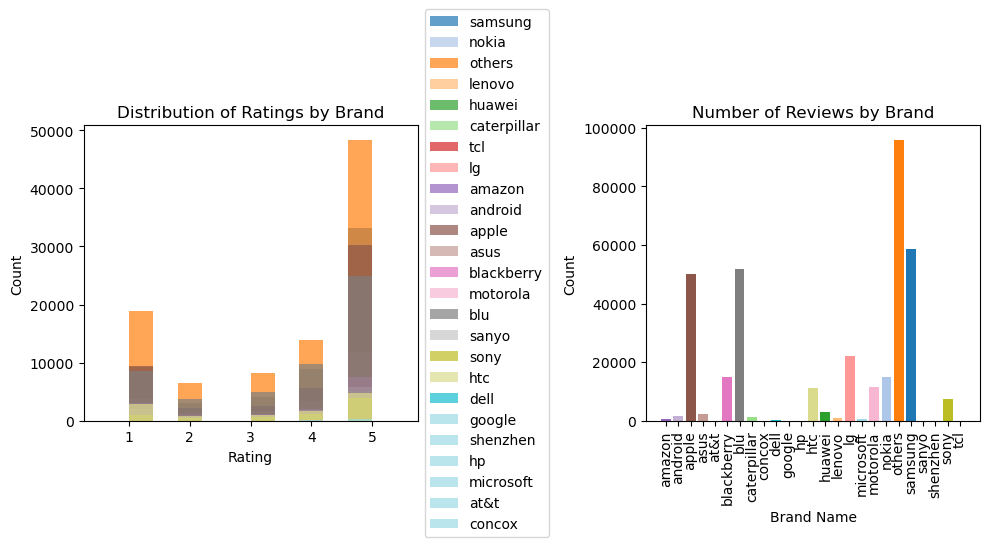

In [13]:
import matplotlib.pyplot as plt

# Get unique brand names
brands = df['Brand Name'].unique()

# Create a dictionary of colors for each brand
color_dict = {}
for i, brand in enumerate(brands):
    color_dict[brand] = plt.cm.tab20(i)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Create a histogram of ratings for each brand in the first subplot
for brand in brands:
    ax1.hist(df[df['Brand Name'] == brand]['Rating'], bins=10, color=color_dict[brand], alpha=0.7, label=brand)

# Add labels and legend to the first subplot
ax1.set_title('Distribution of Ratings by Brand')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Create a bar chart of review counts for each brand in the second subplot
review_counts = df.groupby('Brand Name').size()
ax2.bar(review_counts.index, review_counts.values, color=[color_dict[brand] for brand in review_counts.index])

# Add labels to the second subplot
ax2.set_title('Number of Reviews by Brand')
ax2.set_xlabel('Brand Name')
ax2.set_ylabel('Count')

# Rotate x-axis labels and adjust spacing between subplots
plt.xticks(rotation=90)
fig.tight_layout()

# Show the plot
plt.show()


Stacked bar chart for Mean Price by Brand and Ratings in the dataset:

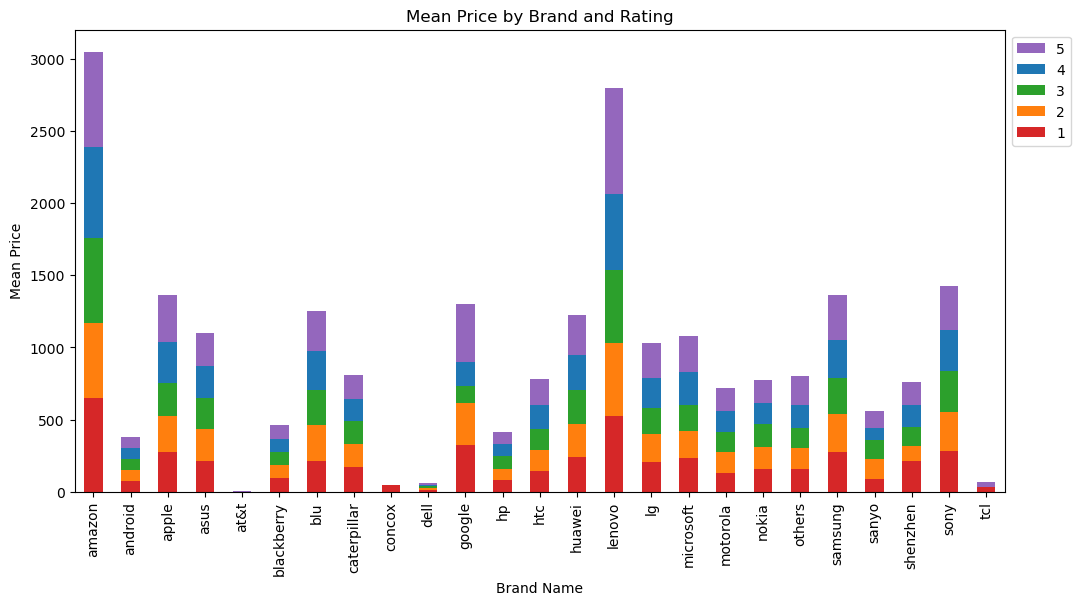

In [14]:
# Calculate the mean price for each brand and rating combination
df_price = df.groupby(['Brand Name', 'Rating']).mean()['Price'].reset_index()

# Pivot the data to create a table of mean prices for each brand and rating combination
df_price_pivot = df_price.pivot(index='Brand Name', columns='Rating', values='Price')

# Define the color map based on the Rating values
cmap = {1: 'tab:red', 2: 'tab:orange', 3: 'tab:green', 4: 'tab:blue', 5: 'tab:purple'}

# Create the stacked bar chart
ax = df_price_pivot.plot(kind='bar', stacked=True, color=df_price_pivot.columns.map(cmap), figsize=(12, 6))

# Set the axis labels and title
ax.set_xlabel('Brand Name')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price by Brand and Rating')

# Create a custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1,1))

plt.show()


## Step 3: Data Preprocessing
We now preprocess the review text to remove any noise and prepare it for analysis. We begin by converting all text to lowercase:

In [15]:
df['Reviews'] = df['Reviews'].str.lower()

Next, we remove any punctuation from the review text:

In [17]:
df['Reviews'] = df_raw['Reviews'].str.replace('[^\w\s]', '')

We then remove any stop words from the Review:

Replace the NaN values with an empty string before applying the lambda function to remove stop words. 

In [19]:
stop_words = stopwords.words('english')
df['Reviews'] = df['Reviews'].fillna('').apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


Finally, we lemmatize the review text to reduce words to their base form:

In [402]:
# !pip install spacy
# Run in terminal
# python -m spacy info
# python -m spacy download en_core_web_sm

In [26]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

# def lemma_text(text):
#     doc = nlp(text)
#     return " ".join([token.lemma_ for token in doc])

# df['Reviews'] = df['Reviews'].apply(lemma_text)

## Step 4: Text Mining
We now perform text mining on the preprocessed review text. We begin by creating a word cloud to visualize the most frequent words in the dataset:

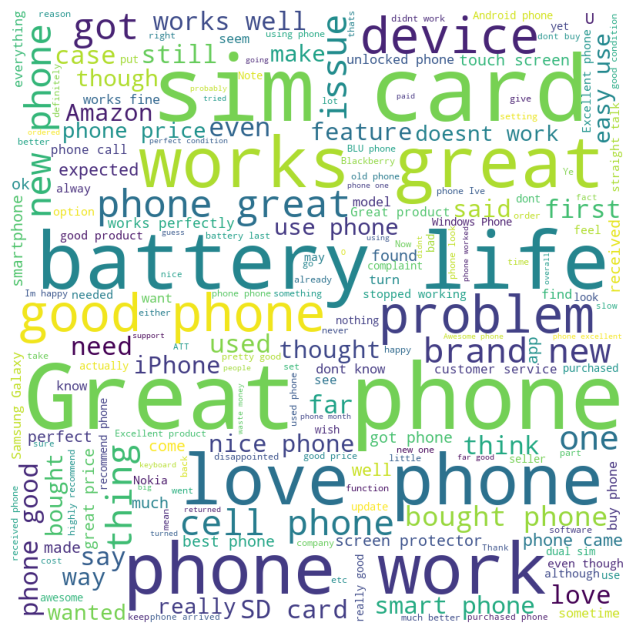

In [21]:
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS).generate(' '.join(df['Reviews']))
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


This produces a word cloud showing the most frequent words in the dataset.

## Step 5: Sentiment Analysis
We now perform sentiment analysis on the preprocessed review text. We begin by splitting the dataset into training and testing sets:

In [22]:
from sklearn.model_selection import train_test_split

X = df['Reviews']
y = df['Rating'].apply(lambda x: 'positive' if x > 3 else ('negative' if x < 3 else 'neutral'))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


We convert the text data into a matrix of token counts using the CountVectorizer class from scikit-learn:

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


We can now build a predictive model using the Naive Bayes algorithm:

In [24]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_cv, y_train)


MultinomialNB()

We evaluate the performance of the model using the testing set:

In [25]:
from sklearn.metrics import classification_report

y_pred = nb.predict(X_test_cv)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.25      0.03      0.05     25576
     neutral       0.09      0.01      0.01      8100
    positive       0.68      0.97      0.80     71237

    accuracy                           0.67    104913
   macro avg       0.34      0.33      0.29    104913
weighted avg       0.53      0.67      0.56    104913



This produces a classification report showing the precision, recall, and F1-score of the model.